In [140]:
import numpy as np
import matplotlib.pyplot as plt

## Definition of the function of the question 2

In [141]:
def f1(t,y):
    return y

def f2(t,y):
    return -y+t

def f3(t,y):
    return np.array([y[1], 2*t-y[0]])

## Definition of the initial conditions of the question 2

In [142]:
# Initial conditions for 1
y0_1 = 1
a1 = 0
b1 = 1

# Initial conditions for 2
a2 = 0
b2 = 2
y0_2 = 1

# Initial conditions for 3
y0_3 = np.array([0, 1])
a3 = 0
b3 = 5

## Question 1 - Euler Explicit Method

In [143]:
def EulerExplicit(f, a, b, y0, N):
    x = [a]
    h = (b-a)/N  # step size
    t = np.linspace(a, b, N+1)  # time vector between a and b
    
    y_n = [y0]  # list to store the values of y

    for i in range(N):
        x.append(x[-1]+h)  # Append the value of x to the list
        y_n.append(y_n[i] + h*f(t[i], y_n[i]))  # Euler Explicit Method and append the value to the list
        
    return y_n, x
            

## Question 2 - Experimentation of the Euler Explicit Method

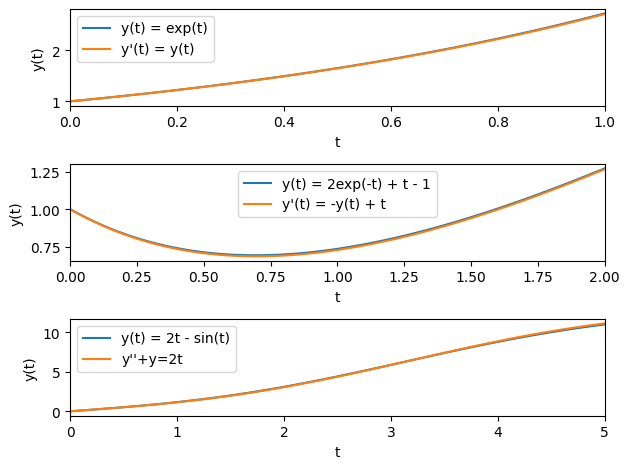

In [146]:
N = 100

list_value_function_1, x1 = EulerExplicit(f1, a1, b1, y0_1, N)
list_value_function_2, x2 = EulerExplicit(f2, a2, b2, y0_2, N)
list_value_function_3, x3 = EulerExplicit(f3, a3, b3, y0_3, N)
for i in range (len(list_value_function_3)):
    list_value_function_3[i] = list_value_function_3[i][0]

fig, axis = plt.subplots(3)  # Create a figure and a set of subplots

# Plot the first function on the first subplot
t1 = np.linspace(a1, b1, N+1)  # time vector between a and b
axis[0].plot(t1, np.exp(x1), label='y(t) = exp(t)')
axis[0].plot(x1, list_value_function_1, label="y'(t) = y(t)")
axis[0].set_xlabel('t')
axis[0].set_xlim([a1, b1])  # Set the limits of the x-axis
axis[0].set_ylabel('y(t)')
axis[0].legend()


# Plot the second function on the second subplot
t2 = np.linspace(a2, b2, N+1)  # time vector between a and b
axis[1].plot(t2, 2*np.exp(-t2) + t2 -1, label='y(t) = 2exp(-t) + t - 1')
axis[1].plot(x2, list_value_function_2, label="y'(t) = -y(t) + t")
axis[1].set_xlabel('t')
axis[1].set_ylabel('y(t)')
axis[1].set_xlim([a2, b2])  # Set the limits of the x-axis
axis[1].legend()

# Plot the third function on the third subplot
t3 = np.linspace(a3, b3, N+1)
axis[2].plot(t3, 2*t3-np.sin(t3), label='y(t) = 2t - sin(t)')
axis[2].plot(x3, list_value_function_3, label="y''+y=2t")
axis[2].set_xlabel('t')
axis[2].set_ylabel('y(t)')
axis[2].set_xlim([a3, b3])  # Set the limits of the x-axis
axis[2].legend()

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()

As we can see the Euler Explicit Method is accurate for the two function in the interval [0,1] and [0,2] respectively. However, for the third function, the method is a little bit less accurate. This is due to the fact that the Euler Explicit Method is only accurate for first order differential equations. The third function is a second order differential equation.

## Question 4 - Pendulum motion

In [148]:
L = 1
g = 9.81
N = 200 # to have h=0.04
initial_conditions = np.array([np.pi/2, 0])
a = 0
b = 8

def f4(t,y):
    return np.array([y[1], (-g/L)*np.sin(y[0])])

In [149]:
y_n, x = EulerExplicit(f4, a, b, initial_conditions, N)